## ASTR777 Star and Planet Formation Problem Set 7
### The CO emission surface of HD163296
### based on Richard Teague eddy tutorial 2 (https://eddy.readthedocs.io/en/latest/tutorials/tutorial_2.html)

In [1]:
from multiprocessing import Pool
import matplotlib.pyplot as plt
from eddy import rotationmap

%matplotlib inline

Assuming uncertainties in HD163296_CO_dv0.fits.


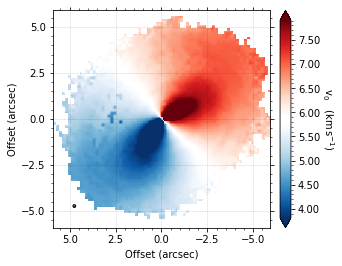

In [2]:
# Plot the velocity field from the MAPS data products
cube = rotationmap(path='HD163296_CO_v0.fits',
                   downsample='beam',
                   FOV=12.0)
cube.plot_data()

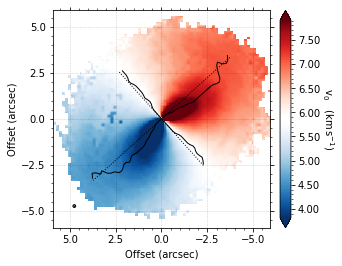

In [3]:
# find the line of maximum and minimum velocities
cube.plot_maxima(inc=46.7,PA=312.0, r_max=5, smooth=0.3)

Assuming:
	p0 = [x0, y0, PA, mstar, vlsr, z0, psi, r_taper, q_taper].


100%|██████████| 1500/1500 [03:45<00:00,  6.66it/s]


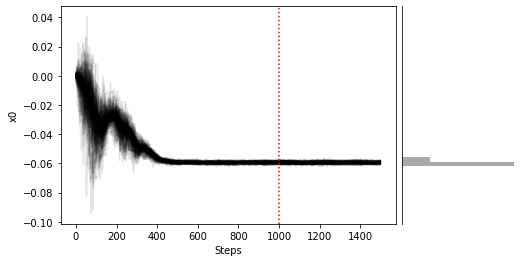

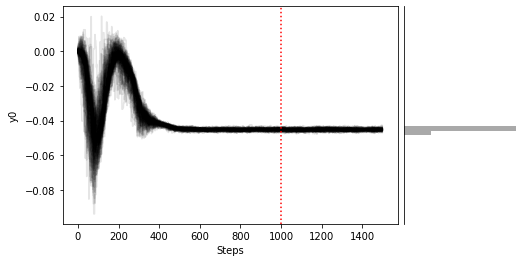

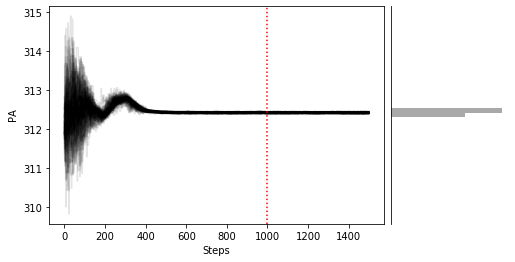

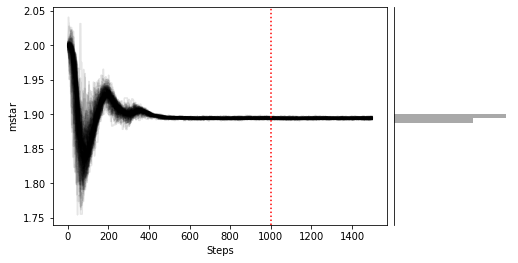

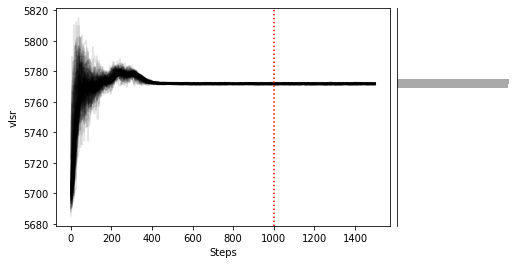

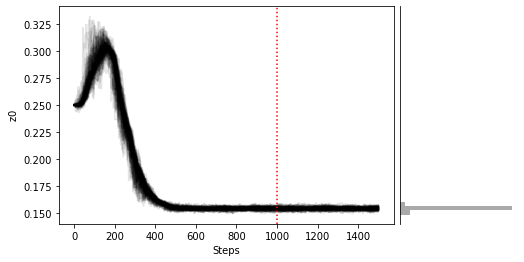

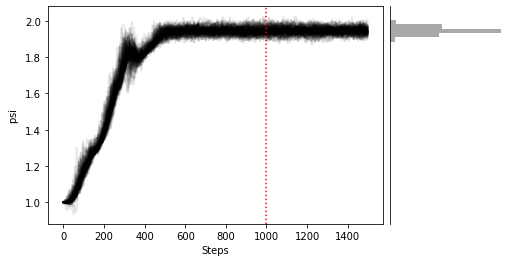

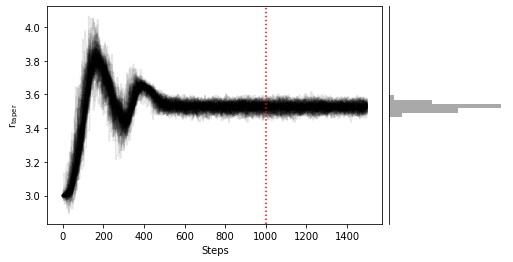

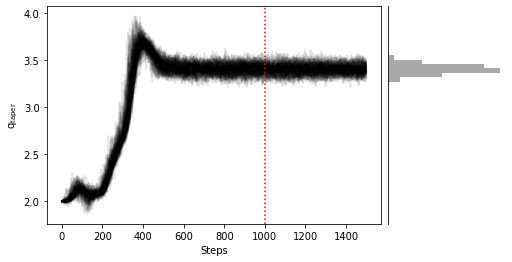

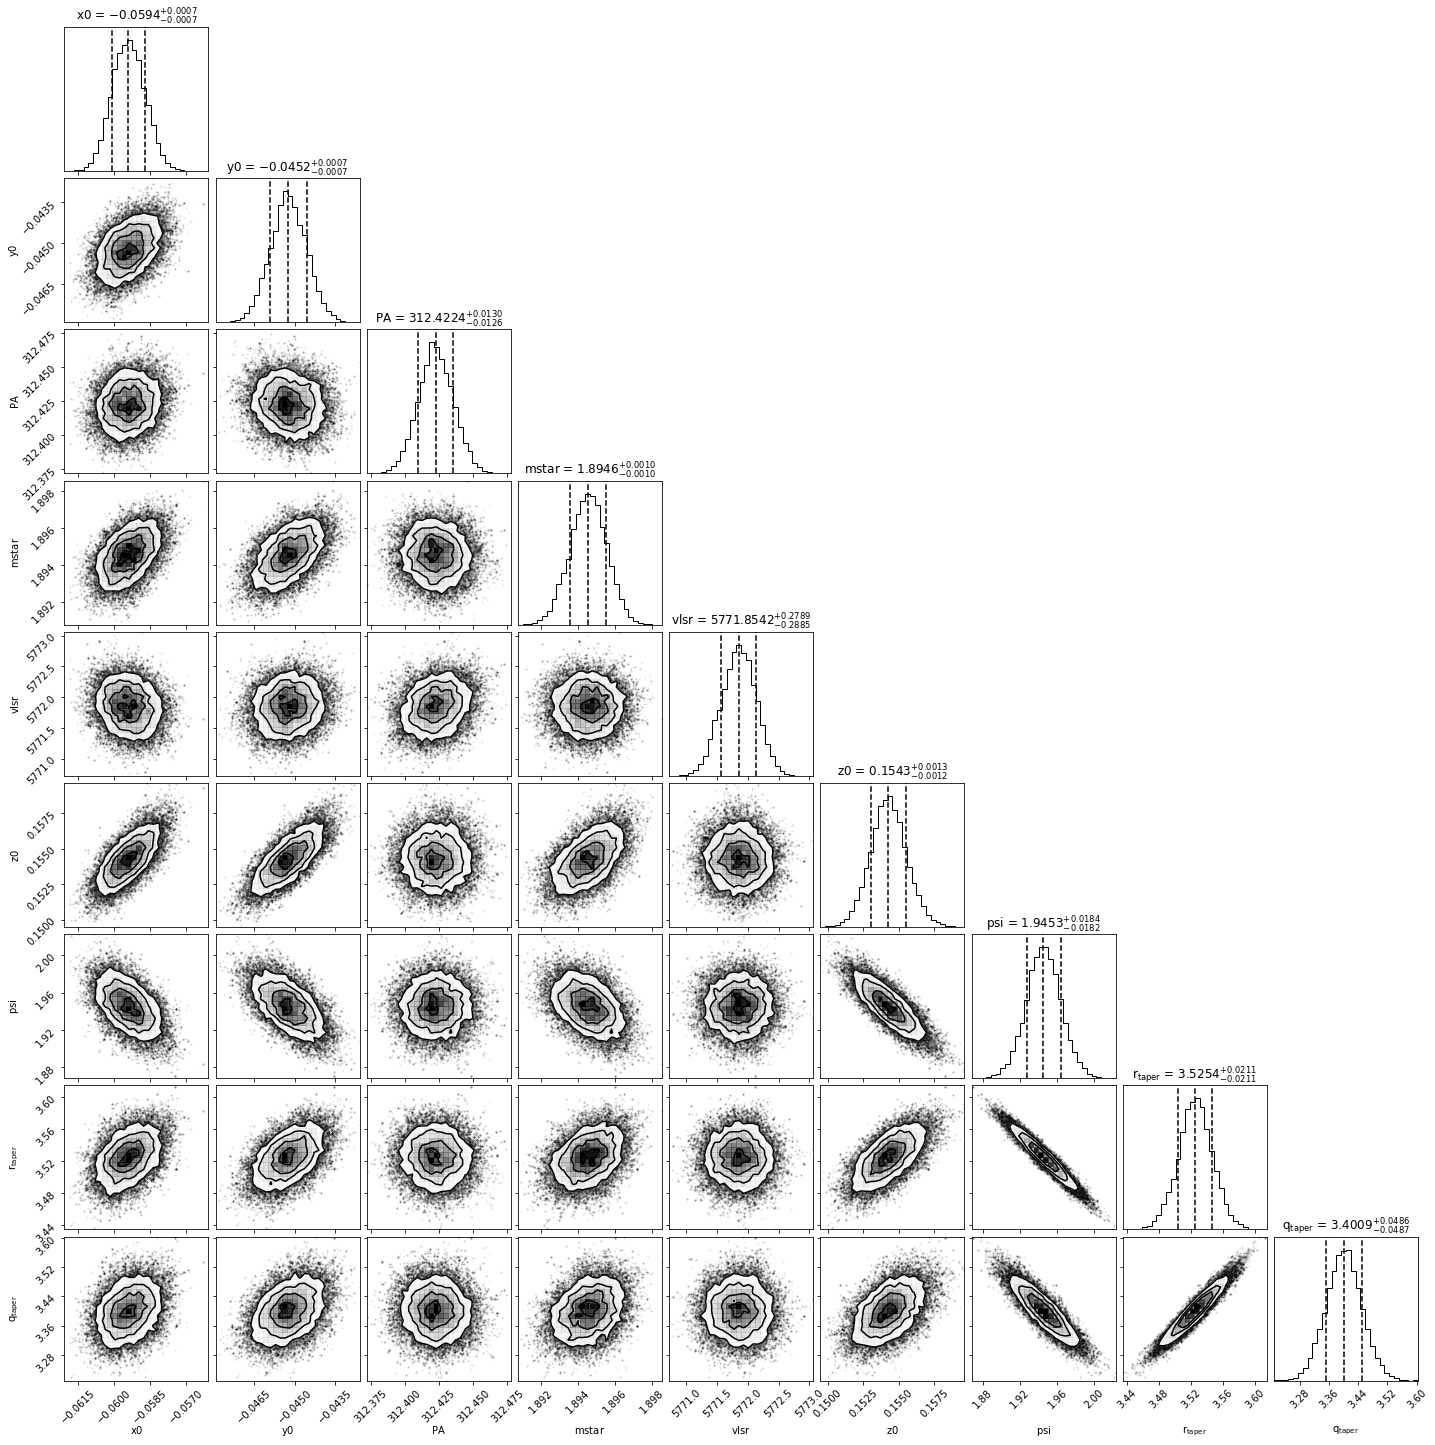

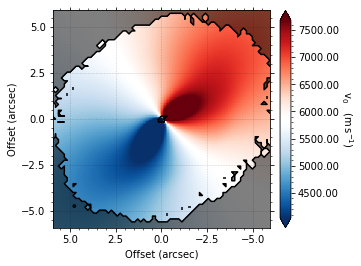

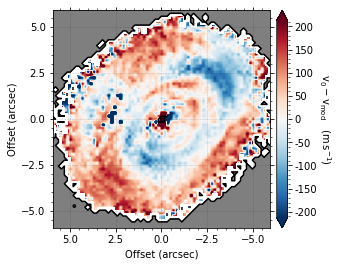

In [4]:
# fit a 3d model
params = {}
params['x0'] = 0
params['y0'] = 1
params['PA'] = 2
params['mstar'] = 3
params['vlsr'] = 4

p0 = [0.0, 0.0, 312., 2.0, 5.7e3]

params['inc'] = 46.7
params['dist'] = 101.0

# Include elevated emission surface parameters.

params['z0'] = 5
params['psi'] = 6
params['r_taper'] = 7
params['q_taper'] = 8

params['r_min'] = 2.0 * cube.bmaj

p0 += [0.25, 1.0, 3.0, 2.0]

with Pool() as pool:
    samples = cube.fit_map(p0=p0, params=params, optimize=False,
                           nwalkers=128, nburnin=1000, nsteps=500,
                           pool=pool)

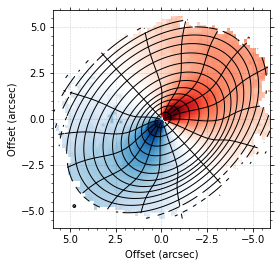

In [9]:
# plot the emission surface
imshow_kwargs = dict(vmin=2.77, vmax=8.77, cmap=cube.cmap())
plot_surface_kwargs = dict(fill='self.data / 1e3',
                           imshow_kwargs=imshow_kwargs)

fig = cube.plot_model_surface(samples, params, plot_surface_kwargs=plot_surface_kwargs)

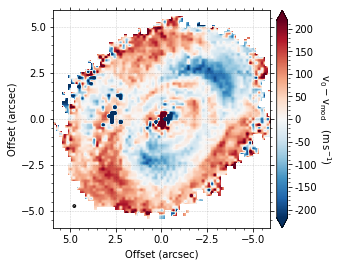

In [10]:
fig = cube.plot_model_residual(samples, params)

In [11]:
print(params)
x0 = np.mean(samples[1000:,0])
y0 = np.mean(samples[1000:,1])
PA = np.mean(samples[1000:,2])
vlsr = np.mean(samples[1000:,4])
z0 = np.mean(samples[1000:,5])
psi = np.mean(samples[1000:,6])
r_taper = np.mean(samples[1000:,7])
q_taper = np.mean(samples[1000:,8])

{'x0': 0, 'y0': 1, 'PA': 2, 'mstar': 3, 'vlsr': 4, 'inc': 46.7, 'dist': 101.0, 'z0': 5, 'psi': 6, 'r_taper': 7, 'q_taper': 8, 'r_min': 0.29999670298236}


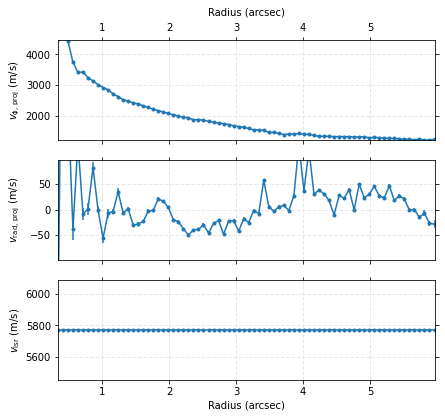

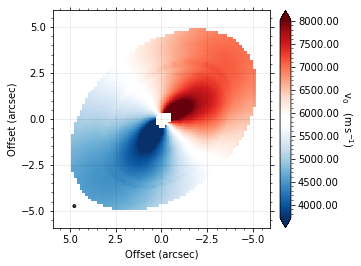

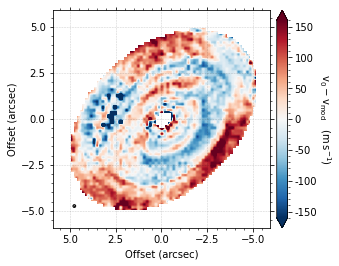

In [12]:
r, v, dv = cube.fit_annuli(x0=x0, y0=y0, inc=46.7, PA=PA, z0=z0, psi=psi, r_taper=r_taper, q_taper=q_taper,
                           r_cavity=0,
                           rbins=np.arange(0.3, 6, 0.5 * cube.bmaj), fix_vlsr=vlsr)

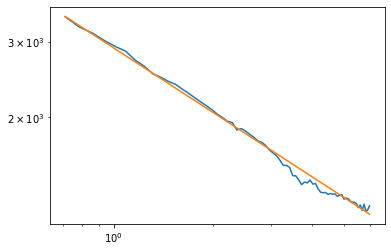

In [13]:
# look at the fitted rotation curve in log-log space to see how it deviates from Keplerian 1/sqrt(r)
# biggest discrepancy is at the disk edge where where the pressure gradient is high (there's nothing pushing back) so the velocity is sub-Keplerian
k = 5
plt.plot(r[k:],v[0,k:])
plt.plot(r[k:],2900/np.sqrt(r[k:]))
plt.xscale('log')
plt.yscale('log')